In [21]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os
from pathlib import Path

def plot_training(trainer_state_path, figure_path, last_checkpoints, exp_name):
    Path(figure_path).mkdir(parents=True, exist_ok=True)

    with open(trainer_state_path) as trainer_history:
        log_history = json.load(trainer_history)

    epoch_train = []
    epoch_val = []
    train_loss = []
    val_loss = []
    lr = []

    for log in log_history["log_history"]:
        if "learning_rate" in log:
            lr.append(log["learning_rate"])
        if 'loss' in list(log.keys()):
            train_loss.append(log['loss'])
        if "eval_loss" in list(log.keys()):
            print(f"there is eval loss\n\n\n\n\n {log["eval_loss"]}")
            val_loss.append(log["eval_loss"])
        if "epoch" in list(log.keys()) and 'loss' in list(log.keys()):
            epoch_train.append(log['epoch'])
        if "epoch" in list(log.keys()) and 'eval_loss' in list(log.keys()):
            epoch_val.append(log['epoch'])

    fig = plt.figure()
    ax = plt.axes()
    #ax.plot(epoch_train, train_loss,label='Train Loss')
    ax.plot(epoch_val, val_loss, label='Val Loss')
    plt.title(f"{exp_name} {last_checkpoints} Learning Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    #plt.axvline(x = 0.1, color = 'b', label = 'Epoch 0.1')
    # plt.axis([6, 10, 0.20, 0.48])
#     plt.axis([0.00, 0.015, 3, 28])
    plt.legend()
    plt.show()
    plt.savefig(os.path.join(figure_path, f'{exp_name}-{last_checkpoints}_learning-curve.png'))


    epoch = []
    val_wer = []

    for log in log_history["log_history"]:
        if "eval_wer" in list(log.keys()):
            val_wer.append(log["eval_wer"])
        if "epoch" in list(log.keys()) and 'eval_wer' in list(log.keys()):
            epoch.append(log['epoch'])

    #epoch = list(set(epoch))
    #epoch.sort()

    fig = plt.figure()
    ax = plt.axes()
    ax.plot(epoch, val_wer, label='Val WER')
    plt.title(f"{exp_name} {last_checkpoints} WER")
    plt.xlabel("Epoch")
    plt.ylabel("Eval WER")
    #plt.axvline(x = 0.1, color = 'b', label = 'Epoch 0.1')
    #plt.axhline(y = 0.26, color = 'r', label = 'y=0.26')
    #plt.axis([0.4, 5, 0.0, 0.2])
    plt.legend()
    plt.show()
    plt.savefig(os.path.join(figure_path, f'{last_checkpoints}_WER.png'))
    
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(epoch_train, lr, label='LR')
    plt.title(f"{exp_name} LR Trend")
    plt.xlabel("Epoch")
    plt.ylabel("Learning Rate")
    # plt.axvline(x = 0.1, color = 'b', label = 'Epoch 0.1')
    plt.legend()
    plt.show()
    
    print(exp_name)
    print(f'Epoch: {epoch[-1]}:')
    print(f'Train Loss:{train_loss[-1]}')
    print(f'Val Loss: {val_loss[-1]}, Val WER: {val_wer[-1]}')
#     print(f'train_runtime: {log_history["max_steps"]}:')
#     print(f'train_samples_per_second: {log_history["max_steps"]}:')
    print("<------------------------------------------------------->\n\n")

SyntaxError: f-string: unmatched '[' (3725128829.py, line 25)

In [19]:
!cat src/experiments/wav2vec2-large-xlsr-53-2m-4x4gpu_normal_lr/checkpoints/checkpoint-30250/trainer_state.json	

{
  "best_metric": 1.0,
  "best_model_checkpoint": "/data3/lr_exp/AfriSpeech-Dataset-Paper/src/experiments/wav2vec2-large-xlsr-53-2m-4x4gpu_normal_lr/checkpoints/checkpoint-15125",
  "epoch": 0.7999153808522734,
  "global_step": 30250,
  "is_hyper_param_search": false,
  "is_local_process_zero": true,
  "is_world_process_zero": true,
  "log_history": [
    {
      "epoch": 0.0,
      "learning_rate": 0.0,
      "loss": 27.1831,
      "step": 1
    },
    {
      "epoch": 0.0,
      "learning_rate": 1.0290237467018468e-05,
      "loss": 18.9942,
      "step": 20
    },
    {
      "epoch": 0.0,
      "learning_rate": 2.4538258575197886e-05,
      "loss": 19.9454,
      "step": 40
    },
    {
      "epoch": 0.0,
      "learning_rate": 4.036939313984169e-05,
      "loss": 14.2746,
      "step": 60
    },
    {
      "epoch": 0.0,
      "learning_rate": 5.620052770448549e-05,
      "loss": 6.2457,
      "step": 80
    },
    {
      "epoch": 0.0,
      "learning_rate": 7.203166226912928e-

there is eval loss





there is eval loss







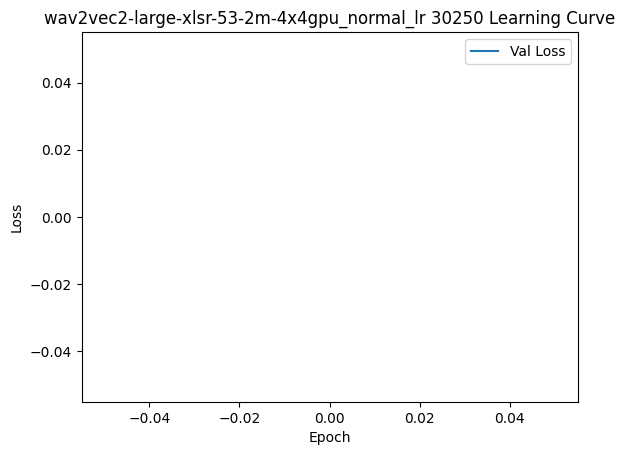

<Figure size 640x480 with 0 Axes>

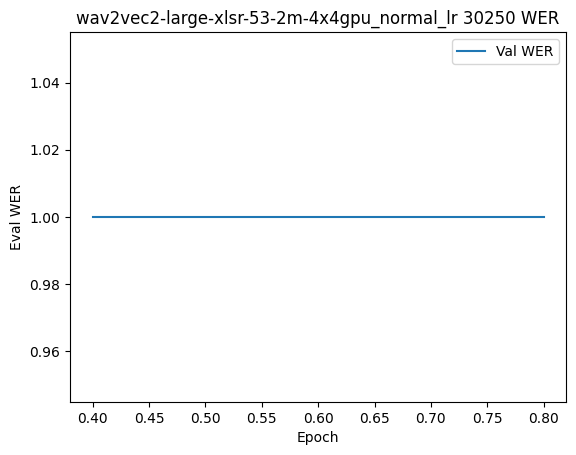

<Figure size 640x480 with 0 Axes>

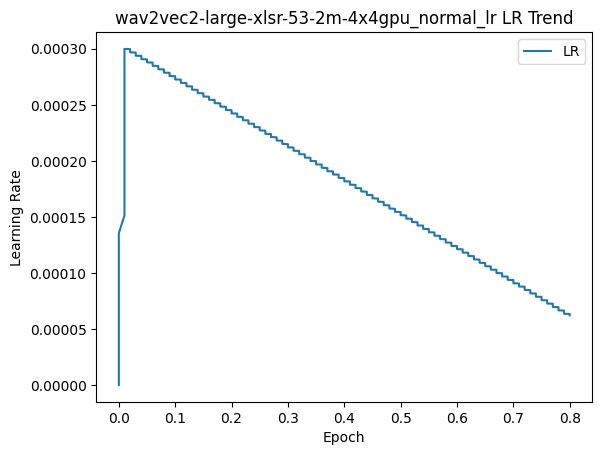

wav2vec2-large-xlsr-53-2m-4x4gpu_normal_lr
Epoch: 0.8:
Train Loss:0.0
Val Loss: nan, Val WER: 1.0
<------------------------------------------------------->




In [20]:
exp_name = "wav2vec2-large-xlsr-53-2m-4x4gpu_normal_lr"
ckpt = "30250"
figure_path = f'/data3/lr_exp/AfriSpeech-Dataset-Paper/src/experiments/{exp_name}/figures/'
trainer_state_path = f'/data3/lr_exp/AfriSpeech-Dataset-Paper/src/experiments/{exp_name}/checkpoints/checkpoint-{ckpt}/trainer_state.json'
plot_training(trainer_state_path, figure_path, ckpt, exp_name)

In [2]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 83.3 MB/s eta 0:00:0000:0100:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached importlib_resources-5.12.0-py3-none-any.whl (36 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.7/299.7 kB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 73.0 MB/s eta 0:00:00
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 82.9 MB/s eta 0:00:00
